# running the mario kart data 

In [1]:
# we need the library json as the reddit data is stored in line-delimited json objects
# (one json object in each line, with each line representing a Reddit comment)
import json

# function to load all comment data into a list of strings
# Input: the path of the file including our data
# Output: a list of strings including the body of the Reddit comments
def load_reddit_comment_data(data_directory):

    comments_data = [] # list object that will store the loaded Reddit comments

    # we first open the file that includes our dataset
    with open(data_directory, 'r', encoding='utf-8') as f:
        # iterate the file, reading it line by line
        for line in f:
            # load the data petraining to a line into a json object in memory
            data = json.loads(line)

            # append the comment if not removed
            if data['body']!="[removed]":
                comments_data.append(data['body'])

    # the method returns all the loaded Reddit comments
    return comments_data

In [2]:
import os

path_directory = r"C:\Users\ebbea\OneDrive - Delft University of Technology\DELFT\JAAR 3\Minor\NLP\Data"
json_files = ['mariokart_comments.ndjson', 'mariokart_submissions.ndjson', 'nintendo_comments.ndjson', 'nintendo_submissions.ndjson']

full_paths = [os.path.join(path_directory, filename) for filename in json_files]

In [3]:
mariokart_comments = load_reddit_comment_data(full_paths[0])
# mariokart_submissions = load_reddit_comment_data(full_paths[1])
# nintendo_comments = load_reddit_comment_data(full_paths[2])
# nintendo_submissions = load_reddit_comment_data(full_paths[3])

In [4]:
import nltk
import re
import pandas as pd
from nltk.util import ngrams
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
stop_words = set(stopwords.words('english'))

# function to preprocess the Reddit comments
# Input: a string that includes a text corresponding to a Reddit comment
# Output: a string with the preprocessed Reddit comment
def preprocess(text):
    text = text.lower()  # convert text to lower-case
    text = re.sub('&gt;', '', text) # remove some special characters from the data &gt; corresponds to >
    text = re.sub('&amp;', '', text) # remove some special characters from the data &amp; corresponds to &
    text = re.sub(r'\s+', ' ', text)  # eliminate duplicate whitespaces using regex
    text = re.sub(r'\[[^]]*\]', '', text)  # remove text in square brackets
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation (keep only characters and numbers)
    return text

In [5]:
# run our function to preprocess all comments
preprocessed_comments = [preprocess(comment) for comment in mariokart_comments]

In [12]:
preprocessed_comments

['sure buddy pro tip wumao dont admit it it defeats the purpose',
 'i dont even know what that word is but still free history lesson facts are facts',
 'if you look at the mini map the leader didnt get hit by an item they intentionally slowed down to use the horn on op',
 'well there i go trying to give people more credit than they deserve lol failing at being an ass it is',
 'haha i appreciate your positivity did think there was maybe a chance that the leader accidentally drove off road but you can just about see they didnt from the vid so definitely some foul play ',
 'waaa x100',
 'ah yes chinas actual title',
 'i always play pink gold peach and ill use either the pipe frame or biddybuggy with roller wheels and 9 times out of 10 im waxing the floor with waluigi roy and dk so yeah ill stick with my favorite character ',
 'that was awesome',
 'wow is mk8s item thing different than the others or smt since you get some wacky combos like this',
 'runexpectedkingdomhearts',
 'dang that wa

In [6]:
from textblob import TextBlob

# Example function to get sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

get_sentiment('i used to love this track but now i love it')


0.5

In [7]:
def get_tracknames_regex() -> list[str]:
    with open('MarioKart_tracks_regex.txt', 'r') as file:
        tracks = [line.strip() for line in file.readlines()]
    return tracks

def get_tracknames():
    with open('MarioKart_tracks.txt', 'r') as file:
        tracks = [line.strip() for line in file.readlines()]
    return tracks

In [8]:
import re


def get_track_mentions(comments: list[str], tracks: list[str]):
    filtered_comments = []

    for comment in comments:
        if any(re.search(track, comment) for track in tracks):
            filtered_comments.append(comment)

    return filtered_comments



In [18]:
tracknames_regex = get_tracknames_regex()
track_comments = get_track_mentions(preprocessed_comments, tracknames_regex)

In [19]:
tracknames = get_tracknames()

In [20]:
compiled_patterns = [re.compile(pattern, re.IGNORECASE) for pattern in tracknames_regex]

# Initialize an empty dictionary for the final track comments
track_comments_dict = {name: [] for name in tracknames}

# Iterate over each compiled pattern and the corresponding track name from tracknames
for pattern, track_name in zip(compiled_patterns, tracknames):
    # Check each comment to see if it contains the track pattern
    for comment in track_comments:
        if pattern.search(comment):
            track_comments_dict[track_name].append(comment)

In [21]:
length_dict = {key: len(value) for key, value in track_comments_dict.items()}
length_dict

{'ï»¿SNES Mario Circuit 3': 123,
 'SNES Bowser Castle 3': 92,
 'SNES Donut Plains 3': 155,
 'Rainbow Road (all)': 3332,
 'N64 Kalimari Desert': 447,
 "N64 Toad's Turnpike": 40,
 'N64 Choco Mountain': 272,
 'N64 Royal Raceway': 520,
 'N64 Yoshi Valley': 203,
 'GBA Riverside Park': 162,
 'GBA Mario Circuit': 1287,
 'GBA Boo Lake': 478,
 'GBA Cheese Land': 480,
 'GBA Sky Garden': 497,
 'GBA Sunset Wilds': 269,
 'GBA Snow Land': 565,
 'GBA Ribbon Road': 630,
 'GCN Baby Park': 1119,
 'GCN Dry Dry Desert': 175,
 'GCN Daisy Cruiser': 404,
 'GCN Waluigi Stadium': 670,
 'GCN Sherbet Land': 221,
 'GCN Yoshi Circuit': 261,
 'GCN DK Mountain': 536,
 'DS Cheep Cheep Beach': 89,
 'DS Waluigi Pinball': 1014,
 'DS Shroom Ridge': 457,
 'DS Tick-Tock Clock': 105,
 'DS Mario Circuit': 1287,
 'DS Wario Stadium': 442,
 'DS Peach Gardens': 567,
 'Wii Moo Moo Meadows': 166,
 'Wii Mushroom Gorge': 618,
 'Wii Coconut Mall': 815,
 'Wii DK Summit': 576,
 "Wii Wario's Gold Mine": 9,
 'Wii Daisy Circuit': 165,
 'W

In [61]:
from textblob import TextBlob

# Dictionary to hold the count of positive and negative comments for each track
track_sentiment_counts = {}

for track, comments in track_comments_dict.items():
    positive_count = 0
    negative_count = 0

    for comment in comments:
        sentiment = TextBlob(comment).sentiment.polarity
        if sentiment > 0:
            positive_count += 1
        elif sentiment < 0:
            negative_count += 1

    track_sentiment_counts[track] = (positive_count, negative_count)

from textblob import TextBlob
import heapq

# Dictionary to hold the best and worst 5 comments for each track
track_best_worst_comments = {}

for track, comments in track_comments_dict.items():
    # Lists to hold the top 5 positive and negative comments
    top_positive = []
    top_negative = []

    for comment in comments:
        sentiment = TextBlob(comment).sentiment.polarity

        if sentiment > 0:
            # Add to positive comments and maintain size 5
            heapq.heappush(top_positive, (-sentiment, comment))
            if len(top_positive) > 5:
                heapq.heappop(top_positive)

        elif sentiment < 0:
            # Add to negative comments and maintain size 5
            heapq.heappush(top_negative, (sentiment, comment))
            if len(top_negative) > 5:
                heapq.heappop(top_negative)

    # Convert heap to sorted list
    best_comments = [heapq.heappop(top_positive)[1] for _ in range(len(top_positive))][::-1]
    worst_comments = [heapq.heappop(top_negative)[1] for _ in range(len(top_negative))][::-1]

    track_best_worst_comments[track] = {'Best Comments': best_comments, 'Worst Comments': worst_comments}

# Example usage
# track_comments_dict = {'Track1': ['Good track', 'Bad track', ...], 'Track2': [...], ...}
# detailed_comments = track_best_worst_comments


In [62]:
track_sentiment_counts
track_best_worst_comments

{'ï»¿SNES Mario Circuit 3': {'Best Comments': ['its extremely rare you get shocked 3 times its only every once in a while on long bagging tracks like cheese land or mc3 1 shock races are definitely the most common and theyre pretty bearable because it adds a huge element to the game of planning around it with itsms',
   'definitely want some elevation adjustments mc4 badly lacks personality even for a snes track since its mostly an mc3 clone i know its somewhat sacrilegious for a snes mc track but i really think it needs to be done to give mc4 identity',
   'the dlc is weird for me some really stupid choices imo like toad circuit and mc3 but then some really awesome and unexpected choices like shroom ridge and snow land not sure if youve seen the leaks for next wave so i wont spoil but there are definitely some interesting choices in there',
   'could be but im very unsure about that i mean mc4 is the only snes mario circuit track that was never remade before minus super circuit obviou

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_10_stacked_bar(track_reviews):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(track_reviews, orient='index', columns=['Positive', 'Negative'])
    
    # Calculate the total reviews (positive + negative) and sort
    df['Total'] = df['Positive'] + df['Negative']
    df_sorted = df.sort_values(by='Total', ascending=False).head(10)

    # Plotting
    fig, ax = plt.subplots()
    df_sorted[['Positive', 'Negative']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Top 10 Most Mentioned Mario Kart Tracks')
    ax.set_xlabel('Track')
    ax.set_ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage
# track_reviews = {'Track1': (5, 3), 'Track2': (8, 2), ... }
# plot_top_10_stacked_bar(track_reviews)


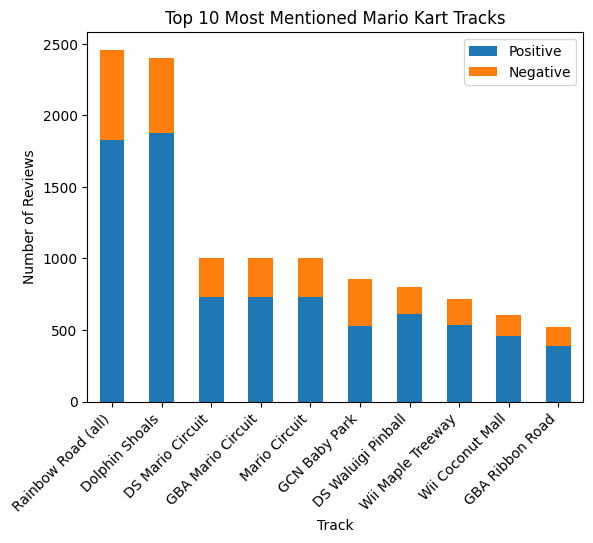

In [24]:
plot_top_10_stacked_bar(track_sentiment_counts)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_positive_percentage(track_reviews, min_reviews=10, num_bars=10):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(track_reviews, orient='index', columns=['Positive', 'Negative'])
    
    # Calculate the total number of reviews and the percentage of positive reviews
    df['Total_Reviews'] = df['Positive'] + df['Negative']
    df['Positive_Percentage'] = (df['Positive'] / df['Total_Reviews']) * 100

    # Filter out tracks with fewer than the minimum required number of reviews
    df_filtered = df[df['Total_Reviews'] >= min_reviews]

    # Sort by the percentage of positive reviews and select the top 10
    df_sorted = df_filtered.sort_values(by='Positive_Percentage', ascending=False).head(num_bars)

    # Plotting
    fig, ax = plt.subplots()
    df_sorted['Positive_Percentage'].plot(kind='bar', ax=ax, color='green')
    ax.set_title(f'Top 10 Tracks with Highest Percentage of Positive Reviews (Min {min_reviews} Reviews)')
    ax.set_xlabel('Track')
    ax.set_ylabel('Percentage of Positive Reviews (%)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_worst_positive_percentage(track_reviews, min_reviews=10, num_bars=10):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(track_reviews, orient='index', columns=['Positive', 'Negative'])
    
    # Calculate the total number of reviews and the percentage of positive reviews
    df['Total_Reviews'] = df['Positive'] + df['Negative']
    df['Positive_Percentage'] = (df['Positive'] / df['Total_Reviews']) * 100

    # Filter out tracks with fewer than the minimum required number of reviews
    df_filtered = df[df['Total_Reviews'] >= min_reviews]

    # Sort by the percentage of positive reviews and select the top 10
    df_sorted = df_filtered.sort_values(by='Positive_Percentage', ascending=True).head(num_bars)

    # Plotting
    fig, ax = plt.subplots()
    df_sorted['Positive_Percentage'].plot(kind='bar', ax=ax, color='green')
    ax.set_title(f'Top 10 Tracks with Lowest Percentage of Positive Reviews (Min {min_reviews} Reviews)')
    ax.set_xlabel('Track')
    ax.set_ylabel('Percentage of Positive Reviews (%)')
    plt.xticks(rotation=45, ha='right')
    plt.show()
# Example usage
# track_reviews = {'Track1': (5, 3), 'Track2': (8, 2), ... }
# plot_top_10_positive_percentage(track_reviews)
def plot_top_n_negative_reviews(track_reviews, n=10):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(track_reviews, orient='index', columns=['Positive', 'Negative'])

    # Sort by the number of negative reviews and select the top N
    df_sorted = df.sort_values(by='Negative', ascending=False).head(n)

    # Plotting
    fig, ax = plt.subplots()
    df_sorted['Negative'].plot(kind='bar', ax=ax, color='red')
    ax.set_title(f'Top {n} Tracks with Most Negative Reviews')
    ax.set_xlabel('Track')
    ax.set_ylabel('Number of Negative Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()

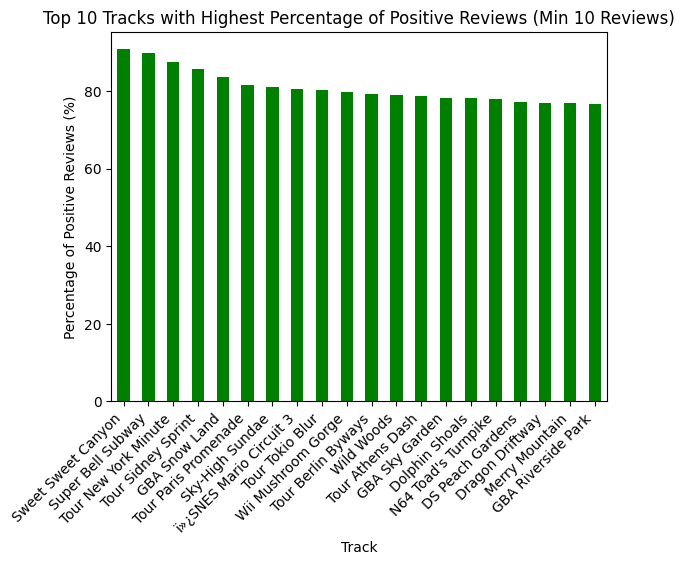

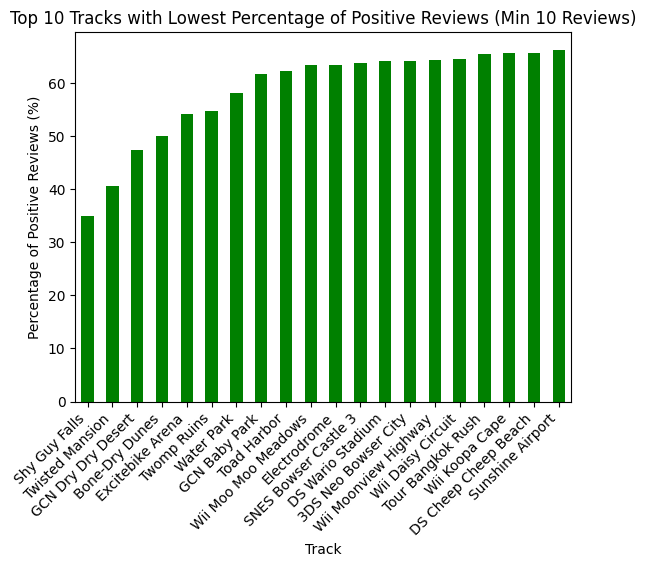

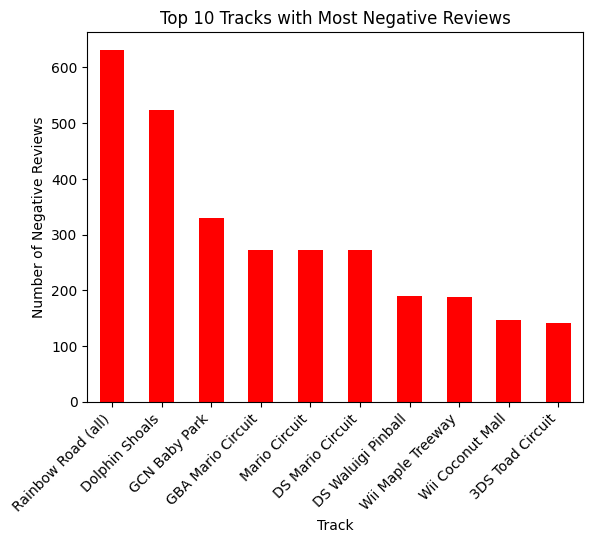

In [54]:
plot_top_positive_percentage(track_sentiment_counts, num_bars=20)
plot_worst_positive_percentage(track_sentiment_counts, num_bars=20)
plot_top_n_negative_reviews(track_sentiment_counts)